In [1]:
#importing libraries and packages
import sys,os,time
print(sys.executable)
import pandas as pd
from datetime import datetime
import numpy as np
#import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.markers
from pandas.tseries.frequencies import to_offset# needed to set the time offset to match to the muons DF
import seaborn as sns
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Dense
#mport tensorflow as tf

/usr/bin/python3


In [2]:
from datetime import datetime, timedelta
def merge_tables(df1, dfpt):
    t1start=pd.Timestamp(df1.index[0])
    t1end=pd.Timestamp(df1.index[-1])
    print(t1start,t1end)
    dfpt1 = dfpt.loc[t1start:t1end].copy()
    merged_tab=pd.merge(df1,dfpt1, how='inner', left_index=True, right_index=True)
    return merged_tab

In [3]:
def calc_percent_change(merged_df):
    merged_df["counts_pct"] = ((merged_df['counts'] - merged_df['counts'].mean())/ 
                      merged_df['counts'].mean()*100)
    merged_df["counts_m_avg"] = merged_df.rolling('6H').counts_pct.mean()
    merged_df["press_pct"] = 2*((merged_df['mslp'] - merged_df['mslp'].mean())/ 
                      merged_df['mslp'].mean()*100)
    merged_df["temp_pct"] = ((merged_df['tmpf'] - merged_df['tmpf'].mean())/ 
                      merged_df['tmpf'].mean()*100)
    merged_df['temp_scaled'] = 0.1*merged_df['temp_pct']
    #merged_df1["delta_cts"]  = (merged_df1["counts"]-merged_df1["counts"].mean())/merged_df1["counts"]
    #merged_df1["delta_pres"] = (merged_df1["mslp"]-merged_df1["mslp"].mean())/merged_df1["mslp"]
    merged_df["delta_cts"]  = np.log((merged_df["counts"])/merged_df["counts"].mean())
    merged_df["delta_pres"] = (merged_df["mslp"]-merged_df["mslp"].mean())
    print(merged_df["mslp"].mean(),merged_df["mslp"].std(), merged_df['counts_pct'].max(), merged_df["counts"].mean(),merged_df["counts_pct"].std())

In [4]:
fname1 = '/home/cosmic/onlineMon/data/markV/2020-07-09_09h51m36s_CH1-0100mV_CH2-0100mV_CH2-0100mV_CH2-0100mV_EXT-T.dat'
fname2 = '/home/cosmic/onlineMon/data/markV/2020-12-23_14h38m11s_CH1-0100mV_CH2-0100mV_CH2-0100mV_CH2-0100mV_EXT-T.dat'
fname3 = '/home/cosmic/onlineMon/data/markV/2021-03-22_17h25m31s_CH1-0100mV_CH2-0100mV_CH2-0100mV_CH2-0100mV_EXT-T.dat'
fname4 = '/home/cosmic/onlineMon/data/markV/2021-05-25_12h10m31s_CH1-0100mV_CH2-0100mV_CH2-0100mV_CH2-0100mV_EXT-T.dat'
fname5 = '/home/cosmic/onlineMon/data/markV/2021-07-08_10h00m51s_CH1-0100mV_CH2-0100mV_CH2-0100mV_CH2-0100mV_EXT-T.dat'
fname6 = '/home/cosmic/onlineMon/data/markV/2021-11-24_11h09m18s_CH1-0100mV_CH2-0100mV_CH2-0100mV_CH2-0100mV_EXT-T.dat'
fname7 = '/home/cosmic/onlineMon/data/markV/markV.log'
dft1 = pd.read_csv(fname1, sep='\t',names=["counts"])
dft2 = pd.read_csv(fname2, sep='\t',names=["counts"])
dft3 = pd.read_csv(fname3, sep='\t',names=["counts"])
dft4 = pd.read_csv(fname4, sep='\t',names=["counts"])
dft5 = pd.read_csv(fname5, sep='\t',names=["counts"])
dft6 = pd.read_csv(fname6, sep='\t',names=["counts"])
dft7 = pd.read_csv(fname7, sep='\t',names=["counts"])
dft1
frames = [dft1, dft2, dft3, dft4, dft5, dft6, dft7]
#df1     = pd.concat(frames)
df1    = pd.read_csv(fname7, sep='\t',names=["counts"])
df1

,counts
0,148 -1 -1 Mon Aug 8 12:28:37 2022
1,181 0 0 Mon Aug 8 12:29:37 2022
2,163 0 0 Mon Aug 8 12:30:37 2022
3,186 0 0 Mon Aug 8 12:31:37 2022
4,201 0 0 Mon Aug 8 12:32:37 2022
...,...
279116,1 0 0 Sat Feb 18 07:26:24 2023
279117,1 0 0 Sat Feb 18 07:27:38 2023
279118,1 0 0 Sat Feb 18 07:29:01 2023
279119,1 0 0 Sat Feb 18 07:30:25 2023


In [5]:
df1= df1['counts'].str.split(" ", n = 3,expand = True)
df1


,0,1,2,3
0,148,-1,-1,Mon Aug 8 12:28:37 2022
1,181,0,0,Mon Aug 8 12:29:37 2022
2,163,0,0,Mon Aug 8 12:30:37 2022
3,186,0,0,Mon Aug 8 12:31:37 2022
4,201,0,0,Mon Aug 8 12:32:37 2022
...,...,...,...,...
279116,1,0,0,Sat Feb 18 07:26:24 2023
279117,1,0,0,Sat Feb 18 07:27:38 2023
279118,1,0,0,Sat Feb 18 07:29:01 2023
279119,1,0,0,Sat Feb 18 07:30:25 2023


In [6]:
#df1 = df1['counts'].str.split(" ", n = 3,expand = True)
df2 = pd.DataFrame(df1.values, columns = ["counts","junk1","junk2","date"])
df2.dtypes
#df2['date'] = pd.to_datetime(df2['date'], utc = True)
#new1 = new1.drop(columns = [1,2])
#df2["date"]= pd.to_datetime(df2['date'], utc = True)
df2["date"]= pd.to_datetime(df2['date'], format="%a %b %d %H:%M:%S %Y")
df2   = df2.set_index('date')
pd.to_datetime(df2.index)
df2["counts"] = df2["counts"].apply(pd.to_numeric)
#pd.to_numeric(df2["counts"])
df2.drop(df2.columns[[1,2]],axis=1, inplace=True)
df2

,counts
date,
2022-08-08 12:28:37,148
2022-08-08 12:29:37,181
2022-08-08 12:30:37,163
2022-08-08 12:31:37,186
2022-08-08 12:32:37,201
...,...
2023-02-18 07:26:24,1
2023-02-18 07:27:38,1
2023-02-18 07:29:01,1


In [7]:
df2.shape

(279121, 1)

In [8]:
df2.info

<bound method DataFrame.info of                      counts
date                       
2022-08-08 12:28:37     148
2022-08-08 12:29:37     181
2022-08-08 12:30:37     163
2022-08-08 12:31:37     186
2022-08-08 12:32:37     201
...                     ...
2023-02-18 07:26:24       1
2023-02-18 07:27:38       1
2023-02-18 07:29:01       1
2023-02-18 07:30:25       1
2023-02-18 07:31:53       1

[279121 rows x 1 columns]>

In [9]:
df2.describe()
df2.dtypes
#df2.resample('H').mean()

counts    int64
dtype: object

In [10]:
df2_hourly = df2.resample('H').sum()
df2_hourly

,counts
date,
2022-08-08 12:00:00,5856
2022-08-08 13:00:00,10743
2022-08-08 14:00:00,10544
2022-08-08 15:00:00,10396
2022-08-08 16:00:00,10350
...,...
2023-02-18 03:00:00,10210
2023-02-18 04:00:00,10192
2023-02-18 05:00:00,10119


In [11]:
df2_hourly.drop(df2_hourly.head(1).index,inplace=True)
df2_hourly.drop(df2_hourly.tail(1).index,inplace=True)
pd.to_datetime(df2_hourly.index).hour
df2_hourly
#df2_hourly[df2_hourly['counts'] < 1000]
df2_hourly.drop(df2_hourly[df2_hourly['counts'] < 5000].index, inplace = True)
df2_hourly

,counts
date,
2022-08-08 13:00:00,10743
2022-08-08 14:00:00,10544
2022-08-08 15:00:00,10396
2022-08-08 16:00:00,10350
2022-08-08 17:00:00,11016
...,...
2023-02-18 02:00:00,10073
2023-02-18 03:00:00,10210
2023-02-18 04:00:00,10192


# Load Pressure Temperature file

In [12]:
fPT1    ='mslp_temp.csv'
df1_PT  = pd.read_csv(fPT1)
df1_PT.drop(df1_PT[df1_PT['mslp'] == 'M'].index, inplace = True)
df1_PT.drop(df1_PT[df1_PT['tmpf'] == 'M'].index, inplace = True)
df1_PT.dropna(inplace=True)
df1_PT['valid'] = pd.to_datetime(df1_PT['valid'])
df1_PT = df1_PT.set_index('valid')
df1_PT = df1_PT.drop(columns=["station"])
loffset = '-52min'
df1_PT.index = df1_PT.index + to_offset(loffset)
df1_PT["mslp"] = df1_PT["mslp"].astype(str).astype(float)
df1_PT["tmpf"] = df1_PT["tmpf"].astype(str).astype(float)
df1_PT.info

<bound method DataFrame.info of                        mslp  tmpf
valid                            
2020-12-31 00:00:00  1022.8  48.0
2020-12-31 01:00:00  1023.3  47.0
2020-12-31 02:00:00  1022.8  47.0
2020-12-31 03:00:00  1022.5  45.0
2020-12-31 04:00:00  1021.9  44.0
...                     ...   ...
2023-12-30 19:00:00  1017.9  48.0
2023-12-30 20:00:00  1018.4  48.0
2023-12-30 21:00:00  1018.8  47.0
2023-12-30 22:00:00  1019.2  44.0
2023-12-30 23:00:00  1020.0  42.0

[26265 rows x 2 columns]>

In [13]:
#df2_hourly.tz_localize('utc')
#df1_PT.tz_localize('utc')
merged_df1= merge_tables(df2_hourly,df1_PT)
#merged_df1=pd.merge(df2_hourly,df1_PT, how='inner', left_index=True, right_index=True)
merged_df1

2022-08-08 13:00:00 2023-02-18 06:00:00


,counts,mslp,tmpf
2022-08-08 13:00:00,10743,1021.3,81.0
2022-08-08 14:00:00,10544,1021.3,82.0
2022-08-08 15:00:00,10396,1021.3,84.0
2022-08-08 16:00:00,10350,1020.7,86.0
2022-08-08 17:00:00,11016,1020.3,86.0
...,...,...,...
2023-02-18 02:00:00,10073,1027.0,36.0
2023-02-18 03:00:00,10210,1027.2,35.0
2023-02-18 04:00:00,10192,1027.0,34.0
2023-02-18 05:00:00,10119,1027.2,33.0


Text(0.5, 1.0, 'MarkV Counts')

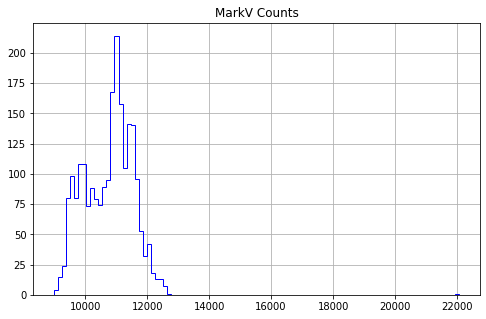

In [34]:
plt.rcParams["axes.grid"] = True
fig, (ax1) = plt.subplots(1,figsize=(8, 5))
#fig.suptitle('Counts')
ax1.hist(merged_df1['counts'], bins=100,histtype='step',label='Counts',color='blue')
#ax1.plot(df2_hourly["counts"],
#marker='.', markersize=1, linestyle='-', linewidth=1, color='red', label='Counts')
ax1.set_title('MarkV Counts')
#ax1.set_xlim([pd.Timestamp('2020-11-03'), pd.Timestamp('2021-04-20')])
#ax1.legend();

In [35]:
from datetime import datetime, timedelta
now = datetime.utcnow().date()
yesterday = datetime.utcnow().date() - timedelta(days=1)
lastmonth = datetime.utcnow().date() - timedelta(days=31)
print(now)
print(yesterday)
print(lastmonth)
#mask = (merged_df1['date'] > yesterday) & (merged_df1['date'] <= now)
#merged_df1.loc[mask]
merged_df1_1day   = merged_df1.loc[yesterday:now].copy()
merged_df1_1day
merged_df1_31days =merged_df1.loc[lastmonth:now].copy()

2022-11-09
2022-11-08
2022-10-09


In [36]:
calc_percent_change(merged_df1)
calc_percent_change(merged_df1_1day)
calc_percent_change(merged_df1_31days)

1017.586648624267 3.739023936761346 105.2283108823394 10757.287776274245 7.4611616754898
1025.4916666666668 1.1654134055334597 10.625198790621841 11397.041666666666 4.983254070334966
1019.5260752688171 4.302131641627308 105.09516123755685 10764.271505376344 7.662503378715659


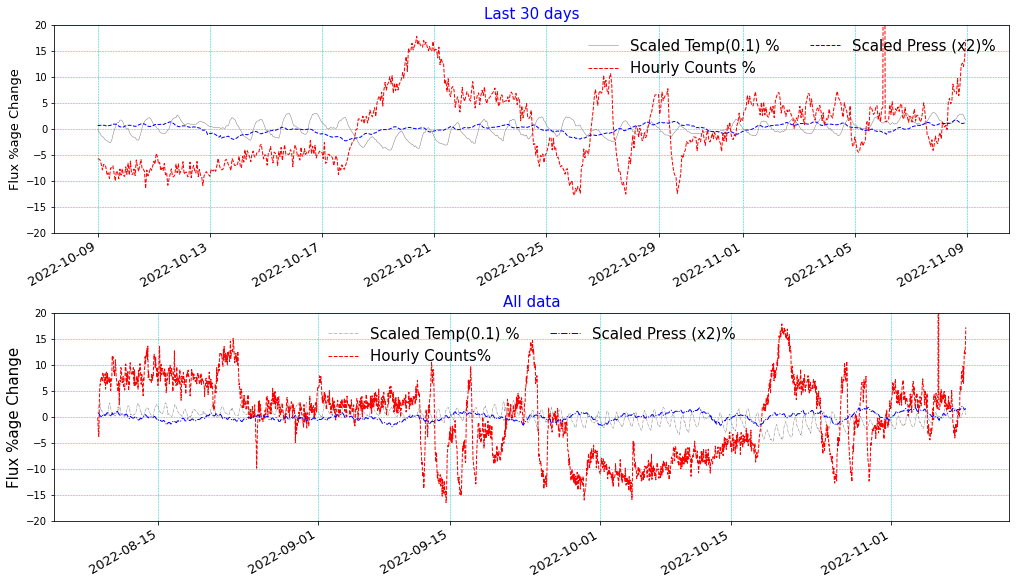

In [19]:
fig = plt.figure(figsize=(14, 8),constrained_layout=True)
gs = fig.add_gridspec(2)
axs = gs.subplots(sharex=False, sharey=False)

#axs[0].set_title('Last 24 hours:'+str(yesterday)+' to ' +str(now),fontsize=15,color='blue')
#axs[0].plot(merged_df1_1day['temp_scaled'],
#linestyle='-', linewidth=0.5, color='gray', label='scaled Temp(0.1) %')
#axs[0].plot(merged_df1_1day['counts_m_avg'],
#linestyle='--', linewidth=2, color='red', label='Running avg (6H) %')
#axs[0].plot(merged_df1_1day['press_pct'],
#linestyle='-', linewidth=1, color='blue', label='Press %')


axs[0].set_title("Last 30 days",fontsize=15,color='blue')
axs[0].plot(merged_df1_31days['temp_scaled'],
linestyle='-', linewidth=0.5, color='gray', label='Scaled Temp(0.1) %')
axs[0].plot(merged_df1_31days['counts_pct'],
#markerfacecolor='white',markeredgecolor="red", marker='o', markersize=1, linestyle='-', linewidth=0.5, color='red', label='Running avg(6H)%')
linestyle='--', linewidth=1, color='red', label='Hourly Counts %')
axs[0].plot(merged_df1_31days['press_pct'],
linestyle='--', linewidth=1, color='blue', label='Scaled Press (x2)%')


axs[1].set_title("All data",fontsize=15,color='blue')
axs[1].plot(merged_df1['temp_scaled'],
            linestyle='-.', linewidth=0.5, color='gray', label='Scaled Temp(0.1) %')
axs[1].plot(merged_df1["counts_pct"],
            linestyle='--', linewidth=1, color='red', label='Hourly Counts%')
axs[1].plot(merged_df1["press_pct"],
            linestyle='-.', linewidth=1, color='blue', label='Scaled Press (x2)%')

axs[0].set_ylabel('Flux %age Change',fontsize=13)
#axs[0].set_ylim([merged_df1_1day['temp_scaled'].min()*1.2, merged_df1_1day['temp_scaled'].max()*1.2])
axs[0].set_ylim(-20,20)
axs[0].legend(ncol=2,frameon=False,fontsize=15);
axs[0].tick_params(axis='x', labelsize=13)
axs[0].grid(True, color = 'DarkTurquoise', alpha=1, linestyle = '--', linewidth = 0.5)


axs[1].set_ylabel('Flux %age Change',fontsize=15)
#axs[1].set_ylim([merged_df1_31days['temp_scaled'].min()*1.3, merged_df1_31days['temp_scaled'].max()*1.3])
axs[1].set_ylim(-20,20)
axs[1].tick_params(axis='x', labelsize=13)
axs[1].legend(ncol=2,frameon=False,fontsize=15)
axs[1].grid(True, color = 'DarkTurquoise', alpha=1, linestyle = '--', linewidth = 0.5)

#axs[2].set_ylabel('Flux %age Change',fontsize=15)
#axs[2].set_xlabel('Date',fontsize=13)
#axs[2].set_ylim([merged_df1['temp_scaled'].min()*1.3, merged_df1['temp_scaled'].max()*1.3])
#axs[2].set_ylim(-30,30)
#axs[2].legend();
#axs[2].legend(ncol=2,frameon=False,fontsize=15)
#axs[2].tick_params(axis='x', labelsize=13)
#axs[2].grid(True, color = 'DarkTurquoise', alpha=1, linestyle = '--', linewidth = 0.5)
plt.setp(axs[1].get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(axs[0].get_xticklabels(), rotation=30, horizontalalignment='right')
plt.savefig('/home/cosmic/onlineMon/images/markV_pct_Ch_mostrecent.png')

-0.0008223908135397986 -0.0027155397958721914 -0.041840840098405295 0.04885800406849982 0.0004172636051166334


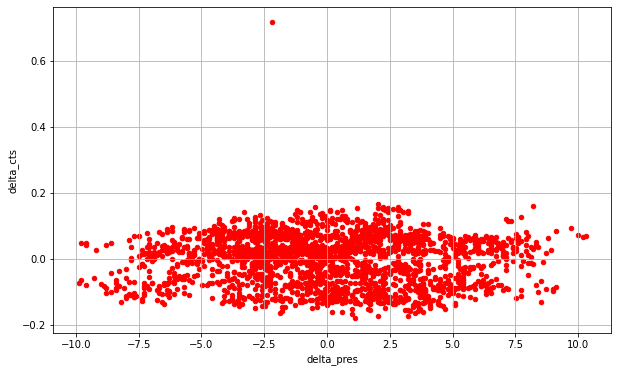

In [20]:
from scipy import stats
#fig, ax = plt.subplots(figsize=(15,10))
slope, intercept, r_value, pv, se = stats.linregress(merged_df1['delta_pres'], merged_df1['delta_cts'])
print(slope, intercept, r_value, pv, se)
plot_P_T = merged_df1.plot.scatter(x='delta_pres',
                   y='delta_cts',
                   c='Red',figsize=(10,6))
baro_coeff = slope;

# Pressure Correction

In [ ]:
# pressure correction
merged_df1["Po"]          = merged_df1["mslp"].mean()
merged_df1["P-Po"]        = merged_df1["mslp"]-merged_df1["Po"]
merged_df1["k(P-Po)"]     = merged_df1["P-Po"]*[-1.0*baro_coeff] # coefficient
#merged_df1["k(P-Po)"]     = merged_df1["k(P-Po)"]
merged_df1["exp"]         = np.exp(merged_df1["k(P-Po)"])
merged_df1["Icorr"]       = merged_df1["counts"]* merged_df1["exp"]
merged_df1["Icorr_pct"] = ((merged_df1['Icorr'] - merged_df1['Icorr'].mean())/ 
                      merged_df1['Icorr'].mean()*100)
merged_df1["Icorr_m_avg"]   = merged_df1.rolling("H").Icorr_pct.mean()
merged_df1                = merged_df1.drop(columns = ["exp","k(P-Po)","k(P-Po)","P-Po"])
merged_df1

In [ ]:
plt.rcParams["axes.grid"] = True
fig, (ax1) = plt.subplots(1,figsize=(14, 5))
#fig.suptitle('Counts')
#ax1.hist(df2_hourly['counts'], bins=100,histtype='step',label='Counts',color='blue')
ax1.plot(merged_df1["Icorr"],
marker='.', markersize=1, linestyle='-', linewidth=1, color='red', label='P_corr counts')
ax1.plot(merged_df1["counts"],
marker='.', markersize=1, linestyle='-', linewidth=1, color='blue', label='Raw counts')
#ax1.set_title('4 Paddle Counts')
#ax1.set_xlim([pd.Timestamp('2020-11-03'), pd.Timestamp('2021-04-20')])
ax1.legend();

In [ ]:
#title1 = now.year()
plt.rcParams["axes.grid"] = True
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(3)
axs = gs.subplots(sharex=False, sharey=False)
#fig.suptitle('Flux %age Change (Muon001 Detector)')
#axs[0].set_title("Last 24 hours (yesterday:now)")
axs[0].set_title('Last 24 hours:'+str(yesterday)+' to ' +str(now))
axs[0].plot(merged_df1.loc[yesterday:now, 'Icorr_m_avg'],
markerfacecolor='white',markeredgecolor="red", marker='o', markersize=4, linestyle='', linewidth=0.5, color='red', label='P-corr counts %')

axs[1].set_title("Last 30 days")
axs[1].plot(merged_df1.loc[lastmonth:now, 'Icorr_m_avg'],
markerfacecolor='white',markeredgecolor="red", marker='o', markersize=3, linestyle='', linewidth=0.5, color='red', label='P-corr counts %')

axs[2].set_title("All data")
axs[2].plot(merged_df1["Icorr_m_avg"],
markerfacecolor='white',markeredgecolor="red", marker='o', markersize=3, linestyle='', linewidth=0.5, color='red', label='P-corr counts %')
#axs[2].plot(merged_df1["counts_m_avg"],
#markerfacecolor='white',markeredgecolor="blue", marker='o', markersize=3, linestyle='', linewidth=0.5, color='blue', label='P-corr counts %')



#axs[2].plot(df1_hourly["Ch23_m_avg"],
#marker='.', markersize=1, linestyle='-', linewidth=1, color='black', label='Ch23_m_avg')

axs[0].set_ylabel('Flux %age Change')
axs[0].set_ylim([-10, 15])
axs[0].legend();
axs[1].set_ylabel('Flux %age Change')
axs[1].set_ylim([-20, 15])
axs[1].legend();
axs[2].set_ylabel('Flux %age Change')
axs[2].set_ylim([-20, 15])
axs[2].legend();
# Hide x labels and tick labels for all but bottom plot.
#for ax in axs:
 #   ax.label_outer()
plt.savefig('markV_pct_Ch_Pcorr.png')